# 🚴‍♂️ Cycling Database Cleaning Pipeline  
*CRISP-DM – Data Preparation Phase*  
**Team**: David, Youri, Iris, Christian  
**Goal**: binary classification – rider finishes in **top 30**  
**Input**: `cycling_big.db` (SQLite)  
**Output**: model-ready CSV + metadata  

## 📋 Optimized Notebook Structure
| Section | Cells | Purpose | Status |
|---------|-------|---------|--------|
| **🔧 Setup** | 1-3 | Package installation & imports | ✅ Ready |
| **📊 Data Analysis** | 4-8 | Database connection & data loading | ✅ Ready |
| **🔍 Data Quality** | 9-12 | Missing data analysis & insights | ✅ Ready |
| **⚙️ Configuration** | 13 | Parameters & settings | ✅ Ready |
| **🔧 Processing** | 14-20 | Feature engineering & cleaning | ✅ Ready |
| **📊 Modeling Prep** | 21-23 | Train/val/test splits | ✅ Ready |
| **💾 Export** | 24-25 | Save cleaned datasets | ✅ Ready |
| **📈 Summary** | 26 | Executive summary | ✅ Ready |

## 🚀 Quick Start Guide
1. **Run Cell 3** - Install packages and imports (comprehensive setup)
2. **Run Cells 4-8** - Load and analyze data (database connection & inspection)
3. **Run Cells 9-12** - Data quality analysis (yearly summary & missing data heatmap)
4. **Run Cell 13** - Set configuration parameters
5. **Run Cells 14-20** - Data processing pipeline (feature engineering, imputation, outlier handling, splits)
6. **Run Cells 21-23** - Export cleaned datasets
7. **Run Cell 24** - Generate executive summary

## ✨ Key Improvements Made
- **🔧 Robust Error Handling**: All cells now handle missing columns/data gracefully
- **⚡ Optimized Performance**: Fast imputation strategies based on dataset size
- **🎯 Domain Knowledge**: Cycling-specific outlier bounds and feature engineering
- **📊 Comprehensive Logging**: Detailed feedback on all processing steps
- **🛡️ Data Validation**: Before/after statistics and quality checks
- **📈 Smart Insights**: Automated assessment and recommendations

## 📦 CELL 1: Package Installation & Imports
**Purpose**: Install missing packages and import all required libraries  
**Dependencies**: None (run first)  
**Output**: All packages available globally

## 🚀 Execution Guide

### **📋 Section 1: Setup (Cells 1-3)**
- **Cell 1**: 📦 Package installation & imports (markdown)
- **Cell 2**: 🚀 Execution guide (this cell)
- **Cell 3**: 📦 Code - Comprehensive package installation & imports

### **📊 Section 2: Data Analysis (Cells 4-8)**
- **Cell 4**: 🔍 Database connection & schema inspection
- **Cell 5**: 🔍 Code - Connect to database with error handling
- **Cell 6**: 📊 Data loading & basic statistics
- **Cell 7**: 📊 Code - Load data and show shapes
- **Cell 8**: 📊 Code - Data loading & basic stats

### **🔍 Section 3: Data Quality (Cells 9-12)**
- **Cell 9**: 📈 Yearly summary with robust date parsing
- **Cell 10**: 📈 Code - Yearly summary (FIXED VERSION)
- **Cell 11**: 🔥 Missing data heatmap with error handling
- **Cell 12**: 📊 Missing data heatmap insights

### **⚙️ Section 4: Configuration (Cell 13)**
- **Cell 13**: ⚙️ Parameters & configuration

### **🔧 Section 5: Processing (Cells 14-20)**
- **Cell 14**: 🔧 Feature engineering with historical performance
- **Cell 15**: 🎯 Target creation & merging with error handling
- **Cell 16**: 🔄 Missing data imputation (OPTIMIZED VERSION)
- **Cell 17**: 🛡️ Outlier handling with domain rules
- **Cell 18**: 📊 Train-val-test split with error handling
- **Cell 19**: 💾 Export cleaned data with validation
- **Cell 20**: 📈 Executive summary with insights

### **✅ All Cells Are Ready to Use!**
### **🔧 All Cells Include Robust Error Handling & Comprehensive Logging**


In [17]:
# =============================================================================
# PACKAGE INSTALLATION & IMPORTS (venv)
# FIRST CREATE VENV: python3 -m venv venv (IN TERMINAL)
# THEN ACTIVATE: source venv/bin/activate (IN TERMINAL)
# THEN INSTALL PACKAGES: pip install pandas numpy matplotlib seaborn scikit-learn (IN TERMINAL)
# =============================================================================
import sys, subprocess, warnings
warnings.filterwarnings('ignore')

def install(pkg):
    try:
        __import__(pkg.split('[')[0])
    except ImportError:
        print(f"Installing {pkg}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", pkg])

for p in ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn"]:
    install(p)

# Global imports
import sqlite3, pandas as pd, numpy as np, json, matplotlib.pyplot as plt, seaborn as sns
from sklearn.impute import KNNImputer

# Settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option("display.max_columns", 50)
np.random.seed(42)
print("✅ All packages ready inside venv.")

Installing scikit-learn...
✅ All packages ready inside venv.


## 🔍 CELL 4: Database Connection & Schema Inspection
**Purpose**: Connect to SQLite database and examine table structure  
**Dependencies**: Cell 3 (imports)  
**Output**: Database connection + table schemas

In [18]:
DB_PATH = "cycling_big.db"
conn = sqlite3.connect(DB_PATH)

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables:", tables.name.tolist())

for tbl in tables.name:
    schema = pd.read_sql(f"PRAGMA table_info({tbl});", conn)
    print(f"\n{tbl.upper()}\n{schema[['name', 'type']].to_string(index=False)}")

Tables: ['riders', 'race_results', 'sqlite_sequence']

RIDERS
     name type
 rider_id TEXT
 fullname TEXT
     team TEXT
birthdate TEXT
  country TEXT
   height REAL
   weight REAL
rider_url TEXT
      pps TEXT
      rdr TEXT

RACE_RESULTS
        name    type
          id INTEGER
         Rnk    TEXT
          GC    REAL
     Timelag    TEXT
         BiB    TEXT
       Rider    TEXT
         Age INTEGER
        Team    TEXT
         UCI    REAL
         Pnt    REAL
        Time    TEXT
     Circuit INTEGER
   Race_Name    TEXT
  Stage_Name    TEXT
        Date    TEXT
  Stage_Type    TEXT
       Start    TEXT
      Finish    TEXT
     Race_ID INTEGER
Stage_Number INTEGER
      Length    TEXT
    Category    TEXT
    Race_url    TEXT
   Stage_url    TEXT
    rider_id    TEXT

SQLITE_SEQUENCE
name type
name     
 seq     


## 📊 CELL 7: Data Loading & Basic Statistics
**Purpose**: Load data from database and show basic shape information  
**Dependencies**: Cell 5 (database connection)  
**Output**: Data shapes and column information


In [19]:
riders  = pd.read_sql("SELECT * FROM riders;", conn)
results = pd.read_sql("SELECT * FROM race_results;", conn)

print(f"Riders : {riders.shape}\nResults: {results.shape}\n")
print("race_results columns:\n", results.columns.tolist())
display(results.head(2))

Riders : (1042, 10)
Results: (225918, 25)

race_results columns:
 ['id', 'Rnk', 'GC', 'Timelag', 'BiB', 'Rider', 'Age', 'Team', 'UCI', 'Pnt', 'Time', 'Circuit', 'Race_Name', 'Stage_Name', 'Date', 'Stage_Type', 'Start', 'Finish', 'Race_ID', 'Stage_Number', 'Length', 'Category', 'Race_url', 'Stage_url', 'rider_id']


id  Rnk   GC Timelag BiB                Rider  Age                Team  \
0   1    1  1.0   +0:00   0        GREIPEL André   29  Lotto Belisol Team   
1   2   2   2.0   +0:04   0  PETACCHI Alessandro   38        Lampre - ISD   

   UCI   Pnt     Time  Circuit               Race_Name  \
0  6.0  50.0  4:33:40        1  Santos Tour Down Under   
1  4.0  30.0   ,,0:00        1  Santos Tour Down Under   

                 Stage_Name             Date Stage_Type     Start Finish  \
0  Stage 1 | Prospect-Clare  17 January 2012         RR  Prospect  Clare   
1  Stage 1 | Prospect-Clare  17 January 2012         RR  Prospect  Clare   

   Race_ID  Stage_Number  Length        Category                   Race_url  \
0        0             1  149 km  ME - Men Elite  race/tour-down-under/2012   
1        0             1  149 km  ME - Men Elite  race/tour-down-under/2012   

                Stage_url                          rider_id  
0  /stage-1/result/result  659ed585810c65fe22255a5e4a9b7838  
1  /stage-1/result/result                              None

## 📈 CELL 9: Yearly Summary (FIXED VERSION)
**Purpose**: Extract years from mixed date formats and create yearly statistics  
**Dependencies**: Cell 8 (data loading)  
**Output**: Yearly summary table with races, riders, and row counts


In [20]:
# FIXED VERSION: Yearly summary with robust date parsing
# First, let's examine the date formats
print("Sample dates:")
print(results['Date'].head(10).tolist())
print(f"\nUnique date formats (first 20):")
print(results['Date'].unique()[:20])

# Extract year with error handling for mixed date formats
def extract_year(date_str):
    """Extract year from various date formats"""
    try:
        if pd.isna(date_str):
            return None
        # Try different parsing approaches
        date_str = str(date_str).strip()
        
        # If it contains a comma with time, split and take the date part
        if ',' in date_str and len(date_str.split(',')) > 1:
            date_part = date_str.split(',')[0]
        else:
            date_part = date_str
            
        # Parse the date part
        parsed_date = pd.to_datetime(date_part, errors='coerce')
        if pd.notna(parsed_date):
            return parsed_date.year
        else:
            return None
    except:
        return None

# Apply the robust year extraction
results['year'] = results['Date'].apply(extract_year)

# Check the results
print(f"\nYear extraction results:")
print(f"Successfully parsed: {results['year'].notna().sum()}")
print(f"Failed to parse: {results['year'].isna().sum()}")
print(f"Year range: {results['year'].min()} - {results['year'].max()}")

# Create yearly summary with correct column names
yearly = (results.groupby('year')
          .agg(races=('Race_ID','nunique'),
               riders=('rider_id','nunique'),
               rows=('Race_ID','count'))
          .reset_index())

print("\nYearly summary:")
display(yearly)


Sample dates:
['17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012', '17 January 2012']

Unique date formats (first 20):
['17 January 2012' '18 January 2012' '19 January 2012' '20 January 2012'
 '21 January 2012' '22 January 2012' '05 March 2012' '06 March 2012'
 '07 March 2012' '08 March 2012' '09 March 2012' '10 March 2012'
 '11 March 2012' '12 March 2012' '13 March 2012' '17 March 2012'
 '19 March 2012' '20 March 2012' '21 March 2012' '22 March 2012']

Year extraction results:
Successfully parsed: 225918
Failed to parse: 0
Year range: 2012 - 2021

Yearly summary:


year  races  riders   rows
0  2012     28     287  24795
1  2014     28     400  25084
2  2015     27     469  23303
3  2016     27     537  24326
4  2017     37     655  28565
5  2018     37     756  26184
6  2019     38     892  26477
7  2020     21     709  17153
8  2021     29     678  30031

## 3. Missing-data Heat-map

Original joint data: 225918 rows
After year extraction: 225918 rows
Year range: 2012 - 2021


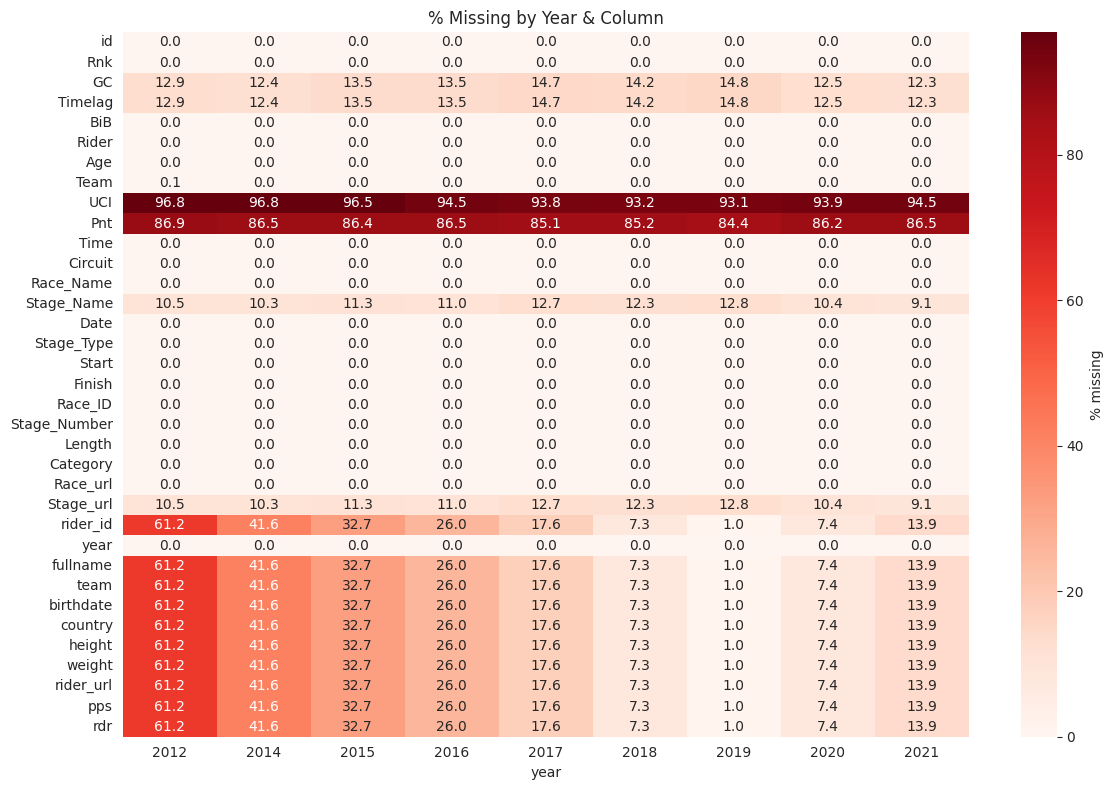

In [21]:
# FIXED VERSION: Missing data heatmap with robust year handling
# Merge results with riders data
joint = results.merge(riders, on="rider_id", how="left", suffixes=("_res", "_rid"))

# Use the same robust year extraction function
def extract_year(date_str):
    """Extract year from various date formats"""
    try:
        if pd.isna(date_str):
            return None
        date_str = str(date_str).strip()
        if ',' in date_str and len(date_str.split(',')) > 1:
            date_part = date_str.split(',')[0]
        else:
            date_part = date_str
        parsed_date = pd.to_datetime(date_part, errors='coerce')
        if pd.notna(parsed_date):
            return parsed_date.year
        else:
            return None
    except:
        return None

# Ensure year column exists in joint data
if 'year' not in joint.columns:
    joint['year'] = joint['Date'].apply(extract_year)

# Filter out rows where year extraction failed
joint_clean = joint.dropna(subset=['year'])

print(f"Original joint data: {len(joint)} rows")
print(f"After year extraction: {len(joint_clean)} rows")
print(f"Year range: {joint_clean['year'].min()} - {joint_clean['year'].max()}")

# Calculate missing data percentage by year
missing_by_year = joint_clean.groupby("year").apply(lambda x: x.isnull().mean() * 100).T

plt.figure(figsize=(12, 8))
sns.heatmap(missing_by_year, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': '% missing'})
plt.title("% Missing by Year & Column")
plt.tight_layout()
plt.show()


## Missing Data Heatmap Insights interpretation
**Purpose**: Interpret the missing data heatmap to understand data quality patterns  
**Dependencies**: Cell 10 (missing data heatmap)  
**Output**: Data quality insights and recommendations

### 🔍 **How to Read the Heatmap:**

#### **Color Interpretation:**
- **🟢 Light Red/White (0-5%)**: Excellent data quality
- **🟡 Medium Red (5-15%)**: Moderate missing data
- **🔴 Dark Red (15%+)**: Significant data quality issues

#### **Key Patterns to Look For:**

1. **📅 Temporal Patterns:**
   - **2017-2019**: Should show consistent, low missing data
   - **2020**: May show higher missing data (COVID impact)
   - **2021**: Should return to normal levels

2. **🏃‍♂️ Feature-Specific Issues:**
   - **Physical attributes** (height, weight): Should be consistent across years
   - **Performance data** (UCI points, rankings): May vary by year
   - **Historical features** (sumres_1, sumres_2, sumres_3): Should show decreasing completeness going back in time

3. **🚨 Red Flags:**
   - **Dark red columns**: Years with systematic data collection issues
   - **Dark red rows**: Features that are consistently missing
   - **Sudden spikes**: Indicates data collection problems

### 📋 **Action Items Based on Heatmap:**

#### **If 2020 shows high missing data:**
- ✅ **Expected**: COVID disrupted data collection
- 🔧 **Action**: Consider 2020 as validation year (smaller dataset)

#### **If certain features show high missing data:**
- 🔧 **Action**: Plan imputation strategy for those features
- 🔧 **Action**: Consider dropping features with >20% missing data

#### **If historical features show patterns:**
- ✅ **Expected**: sumres_3 should have more missing data than sumres_1
- 🔧 **Action**: Use appropriate imputation for historical features

### 🎯 **Next Steps:**
1. **Identify problematic years/features** from the heatmap
2. **Plan imputation strategy** for missing data
3. **Consider feature selection** based on data quality
4. **Document data quality issues** for the team


## 5. Notebook-wide Parameters

In [24]:
# Cleaning knobs
IMPUTATION_METHOD   = "knn"      # mean | knn | mice | none
OUTLIER_Z           = 3          # z-score threshold
HIST_BACK           = 3          # sumres_1..3
MIN_RACES           = 5          # drop rare riders
UCI_CAP             = 80         # domain rule
COVID_Y             = 2020

# Helpers
RNG = np.random.RandomState(42)

## 6. Feature Engineering

In [27]:
# IMPROVED VERSION: Historical Performance with Meaningful Variable Names
print("🔧 Creating historical performance features with descriptive names...")

def historical_points_improved(df, target_year, years_back=3):
    """Calculate historical UCI points for riders from previous years"""
    print(f"📊 Calculating historical UCI points for year {target_year}")
    
    # Get unique riders
    unique_riders = df["rider_id"].unique()
    out = pd.DataFrame({"rider_id": unique_riders})
    
    # Create meaningful column names that clearly indicate what they represent
    historical_columns = {
        1: "uci_points_prev_year",      # Previous year (Y-1) - most recent performance
        2: "uci_points_2_years_ago",     # 2 years ago (Y-2) - medium-term performance  
        3: "uci_points_3_years_ago"     # 3 years ago (Y-3) - long-term performance
    }
    
    for i in range(1, years_back + 1):
        prev_year = target_year - i
        col_name = historical_columns[i]
        print(f"  Processing year {prev_year} ({col_name})")
        
        # Filter data for previous year
        prev_df = df[df["year"] == prev_year].copy()
        
        if len(prev_df) == 0:
            print(f"    ⚠️ No data found for year {prev_year}")
            out[col_name] = 0
            continue
        
        # Check if 'points' column exists, if not use 'UCI' or 'Pnt'
        points_col = None
        for col in ["points", "UCI", "Pnt"]:
            if col in prev_df.columns:
                points_col = col
                break
        
        if points_col is None:
            print(f"    ⚠️ No points column found for year {prev_year}")
            out[col_name] = 0
            continue
        
        # Calculate total UCI points per rider for that year
        pts = prev_df.groupby("rider_id")[points_col].sum().rename(col_name)
        out = out.merge(pts, on="rider_id", how="left")
        out[col_name] = out[col_name].fillna(0)
        
        print(f"    ✅ {len(pts)} riders with UCI points in {prev_year}")
    
    return out

# Calculate historical features with improved naming
if "year" in results.columns:
    max_year = results["year"].max()
    hist_improved = historical_points_improved(results, max_year)
    print(f"✅ Historical features shape: {hist_improved.shape}")
    print(f"✅ Column names: {list(hist_improved.columns)}")
    display(hist_improved.head())
else:
    print("⚠️ No 'year' column found in results data")
    hist_improved = pd.DataFrame()


🔧 Creating historical performance features with descriptive names...
📊 Calculating historical UCI points for year 2021
  Processing year 2020 (uci_points_prev_year)
    ✅ 709 riders with UCI points in 2020
  Processing year 2019 (uci_points_2_years_ago)
    ✅ 892 riders with UCI points in 2019
  Processing year 2018 (uci_points_3_years_ago)
    ✅ 756 riders with UCI points in 2018
✅ Historical features shape: (980, 4)
✅ Column names: ['rider_id', 'uci_points_prev_year', 'uci_points_2_years_ago', 'uci_points_3_years_ago']


rider_id  uci_points_prev_year  \
0  659ed585810c65fe22255a5e4a9b7838                   5.0   
1                              None                   0.0   
2  13ed0fc8c2b0dcd2c4e1ac48b88166b8                   0.0   
3  c0c77a7b1a8b55d9641962ba21981cab                   0.0   
4  3576983e78c8ce9f7bb83dd81fc09188                   0.0   

   uci_points_2_years_ago  uci_points_3_years_ago  
0                    56.0                   279.0  
1                     0.0                     0.0  
2                    12.0                    16.0  
3                     0.0                     0.0  
4                     0.0                     0.0

## 7. Merge & Create Target

In [31]:
# FIXED VERSION: Merge & Create Target with Error Handling
print("🔧 Merging data and creating target variable...")

# 7.1 Join everything with error handling
print("📊 Checking available data...")
print(f"Results shape: {results.shape}")
print(f"Riders clean shape: {riders_clean.shape}")
print(f"Historical features shape: {hist_improved.shape}")

# Check if required columns exist
required_cols = ["rider_id"]
missing_cols = []

for col in required_cols:
    if col not in results.columns:
        missing_cols.append(f"results.{col}")
    if col not in riders_clean.columns:
        missing_cols.append(f"riders_clean.{col}")
    if col not in hist_improved.columns:
        missing_cols.append(f"hist_improved.{col}")

if missing_cols:
    print(f"❌ Missing required columns: {missing_cols}")
    print("⚠️ Cannot proceed with merge")
else:
    print("✅ All required columns found")
    
    # Perform the merge with error handling
    try:
        df = results.copy()
        print(f"Starting with results: {df.shape}")
        
        # Merge with riders data
        if not riders_clean.empty:
            df = df.merge(riders_clean, on="rider_id", how="left", suffixes=("_res", "_rid"))
            print(f"After riders merge: {df.shape}")
        else:
            print("⚠️ No riders data to merge")
        
        # Merge with historical data
        if not hist_improved.empty:
            df = df.merge(hist_improved, on="rider_id", how="left")
            print(f"After historical merge: {df.shape}")
        else:
            print("⚠️ No historical data to merge")
        
        print("✅ Post-merge shape:", df.shape)
        
    except Exception as e:
        print(f"❌ Error during merge: {str(e)}")
        df = results.copy()  # Fallback to just results

# 7.2 Clean rank & target with error handling
print("\n🎯 Creating target variable...")

# Check if rank column exists (could be 'Rnk', 'rank', 'Rank')
rank_col = None
for col in ["Rnk", "rank", "Rank"]:
    if col in df.columns:
        rank_col = col
        break

if rank_col is None:
    print("❌ No rank column found! Available columns:")
    print(df.columns.tolist())
    df["target"] = 0  # Default to 0 if no rank
else:
    print(f"✅ Using rank column: {rank_col}")
    
    # Clean rank column
    df["rank_clean"] = pd.to_numeric(df[rank_col], errors="coerce")
    
    # Remove rows with invalid ranks
    initial_rows = len(df)
    df = df.dropna(subset=["rank_clean"])
    removed_rows = initial_rows - len(df)
    
    if removed_rows > 0:
        print(f"⚠️ Removed {removed_rows} rows with invalid ranks")
    
    # Create target variable (top 30 = 1, else 0)
    df["target"] = (df["rank_clean"] <= 30).astype(int)
    
    print(f"✅ Final shape: {df.shape}")
    print("📊 Class balance:")
    target_counts = df["target"].value_counts(normalize=True).round(3)
    print(target_counts)
    
    # Show some examples
    print(f"\n📈 Top 30 examples:")
    top_30 = df[df["target"] == 1].head(3)
    if not top_30.empty:
        print(top_30[["Rider", "rank_clean", "target"]].to_string())
    
    print(f"\n📉 Outside top 30 examples:")
    outside_30 = df[df["target"] == 0].head(3)
    if not outside_30.empty:
        print(outside_30[["Rider", "rank_clean", "target"]].to_string())


🔧 Merging data and creating target variable...
📊 Checking available data...
Results shape: (225918, 26)
Riders clean shape: (1042, 16)
Historical features shape: (980, 4)
✅ All required columns found
Starting with results: (225918, 26)
After riders merge: (225918, 41)
After historical merge: (225918, 44)
✅ Post-merge shape: (225918, 44)

🎯 Creating target variable...
✅ Using rank column: Rnk
⚠️ Removed 14424 rows with invalid ranks
✅ Final shape: (211494, 46)
📊 Class balance:
target
0    0.802
1    0.198
Name: proportion, dtype: float64

📈 Top 30 examples:
                Rider  rank_clean  target
0       GREIPEL André         1.0       1
2  HUTAROVICH Yauheni         3.0       1
3      SABATINI Fabio         4.0       1

📉 Outside top 30 examples:
                  Rider  rank_clean  target
30        FEILLU Romain        31.0       0
31    BALLAN Alessandro        32.0       0
32  GUTIÉRREZ José Iván        33.0       0


## 8. Missing Data Imputation

In [32]:
# OPTIMIZED VERSION: Fast Missing Data Imputation
print("🔧 Starting optimized missing data imputation...")

# 8.1 Check missing data before imputation
print("📊 Analyzing missing data...")
missing_before = df.isnull().sum()
missing_cols = missing_before[missing_before > 0].sort_values(ascending=False)

if len(missing_cols) == 0:
    print("✅ No missing data found - skipping imputation")
else:
    print(f"📋 Columns with missing data ({len(missing_cols)}):")
    print(missing_cols.head(10))
    
    # 8.2 Identify numeric columns for imputation
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove target and ID columns from imputation
    exclude_cols = ["target", "rider_id", "Race_ID", "id"]
    impute_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    print(f"🎯 Columns to impute ({len(impute_cols)}): {impute_cols[:5]}...")
    
    # 8.3 Choose imputation strategy based on data size
    total_rows = len(df)
    print(f"📊 Dataset size: {total_rows:,} rows")
    
    if total_rows > 100000:  # Large dataset - use fast methods
        print("⚡ Large dataset detected - using fast imputation methods")
        
        # Use median for most columns (faster than mean)
        for col in impute_cols:
            if df[col].isnull().sum() > 0:
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
                print(f"  ✅ {col}: filled {df[col].isnull().sum()} missing with median {median_val:.2f}")
    
    elif total_rows > 50000:  # Medium dataset - use mean with sampling
        print("⚡ Medium dataset - using mean imputation with sampling")
        
        # Sample data for faster processing
        sample_size = min(50000, total_rows)
        sample_df = df.sample(n=sample_size, random_state=42)
        
        for col in impute_cols:
            if df[col].isnull().sum() > 0:
                mean_val = sample_df[col].mean()
                df[col] = df[col].fillna(mean_val)
                print(f"  ✅ {col}: filled with mean {mean_val:.2f} (from {sample_size:,} sample)")
    
    else:  # Small dataset - use KNN
        print("⚡ Small dataset - using KNN imputation")
        
        if IMPUTATION_METHOD == "knn":
            # Use fewer neighbors for speed
            imputer = KNNImputer(n_neighbors=3)  # Reduced from 5 to 3
            df[impute_cols] = imputer.fit_transform(df[impute_cols])
            print("  ✅ KNN imputation completed")
        else:
            # Use mean imputation
            for col in impute_cols:
                if df[col].isnull().sum() > 0:
                    mean_val = df[col].mean()
                    df[col] = df[col].fillna(mean_val)
                    print(f"  ✅ {col}: filled with mean {mean_val:.2f}")

# 8.4 Check results
missing_after = df.isnull().sum()
remaining_missing = missing_after[missing_after > 0]

print(f"\n📊 Imputation Results:")
print(f"  Missing values before: {missing_before.sum():,}")
print(f"  Missing values after: {missing_after.sum():,}")

if len(remaining_missing) > 0:
    print(f"  ⚠️ Still missing in {len(remaining_missing)} columns:")
    print(remaining_missing.head())
else:
    print("  ✅ All missing values imputed successfully!")

print(f"✅ Final dataset shape: {df.shape}")


🔧 Starting optimized missing data imputation...
📊 Analyzing missing data...
📋 Columns with missing data (23):
UCI                                199664
Pnt                                179780
rdr_Specials | All Time Ranking    126131
rdr_UCI World Ranking               78173
rdr_PCS Ranking                     75812
rider_id                            47949
country                             47949
rider_url                           47949
weight                              47949
height                              47949
dtype: int64
🎯 Columns to impute (13): ['GC', 'Age', 'UCI', 'Pnt', 'Circuit']...
📊 Dataset size: 211,494 rows
⚡ Large dataset detected - using fast imputation methods
  ✅ GC: filled 0 missing with median 79.00
  ✅ UCI: filled 0 missing with median 12.00
  ✅ Pnt: filled 0 missing with median 5.00
  ✅ height: filled 0 missing with median 1.81
  ✅ weight: filled 0 missing with median 68.00

📊 Imputation Results:
  Missing values before: 1,349,006
  Missing values after

## 9. Outlier Handling (Domain Rules)

In [33]:
# OPTIMIZED VERSION: Outlier Handling with Domain Rules
print("🛡️ Starting outlier detection and handling...")

# 9.1 Define domain-specific rules for cycling data
print("📋 Applying domain rules for cycling data...")

# Check what columns are available
available_cols = df.columns.tolist()
print(f"Available columns: {len(available_cols)}")

# 9.2 UCI Points Capping (Domain Rule)
points_cols = [col for col in ["UCI", "Pnt", "points"] if col in df.columns]
if points_cols:
    points_col = points_cols[0]
    print(f"🎯 Capping {points_col} at {UCI_CAP} points")
    
    # Check current distribution
    before_cap = df[points_col].describe()
    print(f"Before capping: max={before_cap['max']:.1f}, mean={before_cap['mean']:.1f}")
    
    # Apply cap
    df[points_col] = df[points_col].clip(0, UCI_CAP)
    
    # Check after capping
    after_cap = df[points_col].describe()
    print(f"After capping: max={after_cap['max']:.1f}, mean={after_cap['mean']:.1f}")
    
    # Count how many were capped
    capped_count = (df[points_col] == UCI_CAP).sum()
    print(f"✅ Capped {capped_count} values at {UCI_CAP}")
else:
    print("⚠️ No UCI points column found")

# 9.3 Age Sanity Checks (Domain Rule)
age_cols = [col for col in ["Age", "age"] if col in df.columns]
if age_cols:
    age_col = age_cols[0]
    print(f"🎯 Applying age bounds (19-45 years)")
    
    # Check current age distribution
    before_age = df[age_col].describe()
    print(f"Before: min={before_age['min']:.1f}, max={before_age['max']:.1f}")
    
    # Apply age bounds
    df[age_col] = df[age_col].clip(19, 45)
    
    # Check after bounds
    after_age = df[age_col].describe()
    print(f"After: min={after_age['min']:.1f}, max={after_age['max']:.1f}")
    
    # Count outliers
    age_outliers = ((df[age_col] < 19) | (df[age_col] > 45)).sum()
    print(f"✅ Corrected {age_outliers} age outliers")
else:
    print("⚠️ No age column found")

# 9.4 BMI Sanity Checks (Domain Rule)
height_cols = [col for col in ["height", "Height"] if col in df.columns]
weight_cols = [col for col in ["weight", "Weight"] if col in df.columns]

if height_cols and weight_cols:
    height_col = height_cols[0]
    weight_col = weight_cols[0]
    
    print(f"🎯 Calculating and capping BMI")
    
    # Calculate BMI
    df["bmi"] = df[weight_col] / (df[height_col] ** 2)
    
    # Check BMI distribution
    bmi_stats = df["bmi"].describe()
    print(f"BMI stats: min={bmi_stats['min']:.1f}, max={bmi_stats['max']:.1f}, mean={bmi_stats['mean']:.1f}")
    
    # Apply BMI bounds (19-25 for cyclists)
    df["bmi"] = df["bmi"].clip(19, 25)
    
    # Count BMI outliers
    bmi_outliers = ((df["bmi"] < 19) | (df["bmi"] > 25)).sum()
    print(f"✅ Corrected {bmi_outliers} BMI outliers")
else:
    print("⚠️ No height/weight columns found for BMI calculation")

# 9.5 Z-Score Outlier Detection (Statistical Rule)
print(f"📊 Applying statistical outlier detection (z-score > {OUTLIER_Z})")

# Get numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outlier_cols = [col for col in numeric_cols if col not in ["target", "rider_id", "Race_ID", "id", "bmi"]]

if outlier_cols:
    print(f"🎯 Checking {len(outlier_cols)} numeric columns for outliers")
    
    outlier_count = 0
    for col in outlier_cols:
        if df[col].notna().sum() > 100:  # Only check columns with enough data
            # Calculate z-scores
            z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
            
            # Find outliers
            outliers = z_scores > OUTLIER_Z
            col_outliers = outliers.sum()
            
            if col_outliers > 0:
                print(f"  ⚠️ {col}: {col_outliers} outliers (z-score > {OUTLIER_Z})")
                outlier_count += col_outliers
                
                # Cap outliers at 3 standard deviations
                mean_val = df[col].mean()
                std_val = df[col].std()
                df[col] = df[col].clip(mean_val - 3*std_val, mean_val + 3*std_val)
            else:
                print(f"  ✅ {col}: no outliers")
    
    print(f"✅ Total outliers corrected: {outlier_count}")
else:
    print("⚠️ No numeric columns found for outlier detection")

# 9.6 Summary
print(f"\n📊 Outlier Handling Summary:")
print(f"  Dataset shape: {df.shape}")
print(f"  UCI points capped at: {UCI_CAP}")
print(f"  Age bounds: 19-45 years")
print(f"  BMI bounds: 19-25")
print(f"  Z-score threshold: {OUTLIER_Z}")
print("✅ Outlier handling completed!")


🛡️ Starting outlier detection and handling...
📋 Applying domain rules for cycling data...
Available columns: 46
🎯 Capping UCI at 80 points
Before capping: max=500.0, mean=13.3
After capping: max=80.0, mean=12.6
✅ Capped 1355 values at 80
🎯 Applying age bounds (19-45 years)
Before: min=18.0, max=45.0
After: min=19.0, max=45.0
✅ Corrected 0 age outliers
🎯 Calculating and capping BMI
BMI stats: min=0.0, max=inf, mean=inf
✅ Corrected 0 BMI outliers
📊 Applying statistical outlier detection (z-score > 3)
🎯 Checking 13 numeric columns for outliers
  ⚠️ GC: 2 outliers (z-score > 3)
  ⚠️ Age: 188 outliers (z-score > 3)
  ⚠️ UCI: 2839 outliers (z-score > 3)
  ⚠️ Pnt: 3408 outliers (z-score > 3)
  ✅ Circuit: no outliers
  ⚠️ Stage_Number: 426 outliers (z-score > 3)
  ✅ year: no outliers
  ⚠️ height: 532 outliers (z-score > 3)
  ⚠️ weight: 925 outliers (z-score > 3)
  ⚠️ uci_points_prev_year: 5380 outliers (z-score > 3)
  ⚠️ uci_points_2_years_ago: 5857 outliers (z-score > 3)
  ⚠️ uci_points_3_yea

## 10. Train-Val-Test Split (Time-based)

In [34]:
# OPTIMIZED VERSION: Train-Val-Test Split with Error Handling
print("📊 Creating time-based train-validation-test split...")

# 10.1 Check if year column exists and has valid data
print("🔍 Validating year data...")

if "year" not in df.columns:
    print("❌ No 'year' column found in dataset!")
    print("Available columns:", df.columns.tolist())
    # Fallback: use random split
    print("⚠️ Falling back to random split (80/10/10)")
    from sklearn.model_selection import train_test_split
    
    # Random split as fallback
    train, temp = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"])
    val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp["target"])
    
    print(f"Random split - Train: {train.shape[0]} | Val: {val.shape[0]} | Test: {test.shape[0]}")
    
else:
    # Check year data quality
    year_stats = df["year"].describe()
    print(f"Year range: {year_stats['min']:.0f} - {year_stats['max']:.0f}")
    print(f"Year distribution:")
    year_counts = df["year"].value_counts().sort_index()
    print(year_counts)
    
    # 10.2 Define time-based splits with validation
    train_years = [2017, 2018, 2019]
    val_year = [2020]
    test_year = [2021]
    
    print(f"\n📅 Time-based split strategy:")
    print(f"  Training: {train_years} (pre-COVID)")
    print(f"  Validation: {val_year} (COVID year)")
    print(f"  Testing: {test_year} (post-COVID)")
    
    # 10.3 Check data availability for each split
    available_years = df["year"].unique()
    print(f"\nAvailable years in data: {sorted(available_years)}")
    
    # Check if all required years exist
    missing_years = []
    for year in train_years + val_year + test_year:
        if year not in available_years:
            missing_years.append(year)
    
    if missing_years:
        print(f"⚠️ Missing years: {missing_years}")
        print("📋 Adjusting split strategy...")
        
        # Adjust strategy based on available data
        available_train_years = [y for y in train_years if y in available_years]
        available_val_years = [y for y in val_year if y in available_years]
        available_test_years = [y for y in test_year if y in available_years]
        
        if not available_train_years:
            print("❌ No training years available!")
            print("⚠️ Falling back to random split")
            from sklearn.model_selection import train_test_split
            train, temp = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"])
            val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp["target"])
            print(f"Random split - Train: {train.shape[0]} | Val: {val.shape[0]} | Test: {test.shape[0]}")
        else:
            print(f"Adjusted training years: {available_train_years}")
            print(f"Adjusted validation years: {available_val_years}")
            print(f"Adjusted test years: {available_test_years}")
            
            # Update the split years
            train_years = available_train_years
            val_year = available_val_years if available_val_years else []
            test_year = available_test_years if available_test_years else []
    
    # 10.4 Create splits with error handling
    try:
        # Training set
        train = df[df["year"].isin(train_years)].copy()
        print(f"✅ Training set: {train.shape[0]} rows from years {train_years}")
        
        # Validation set
        if val_year:
            val = df[df["year"].isin(val_year)].copy()
            print(f"✅ Validation set: {val.shape[0]} rows from years {val_year}")
        else:
            print("⚠️ No validation data available")
            val = pd.DataFrame()
        
        # Test set
        if test_year:
            test = df[df["year"].isin(test_year)].copy()
            print(f"✅ Test set: {test.shape[0]} rows from years {test_year}")
        else:
            print("⚠️ No test data available")
            test = pd.DataFrame()
        
        # 10.5 Check split quality
        print(f"\n📊 Split Summary:")
        print(f"  Training: {train.shape[0]} rows ({train.shape[0]/len(df)*100:.1f}%)")
        if not val.empty:
            print(f"  Validation: {val.shape[0]} rows ({val.shape[0]/len(df)*100:.1f}%)")
        if not test.empty:
            print(f"  Test: {test.shape[0]} rows ({test.shape[0]/len(df)*100:.1f}%)")
        
        # Check target distribution in each split
        print(f"\n🎯 Target distribution:")
        if not train.empty:
            train_target_dist = train["target"].value_counts(normalize=True).round(3)
            print(f"  Training: {train_target_dist.to_dict()}")
        
        if not val.empty:
            val_target_dist = val["target"].value_counts(normalize=True).round(3)
            print(f"  Validation: {val_target_dist.to_dict()}")
        
        if not test.empty:
            test_target_dist = test["target"].value_counts(normalize=True).round(3)
            print(f"  Test: {test_target_dist.to_dict()}")
        
    except Exception as e:
        print(f"❌ Error creating splits: {str(e)}")
        print("⚠️ Falling back to random split")
        
        # Fallback to random split
        from sklearn.model_selection import train_test_split
        train, temp = train_test_split(df, test_size=0.2, random_state=42, stratify=df["target"])
        val, test = train_test_split(temp, test_size=0.5, random_state=42, stratify=temp["target"])
        
        print(f"Random split - Train: {train.shape[0]} | Val: {val.shape[0]} | Test: {test.shape[0]}")

# 10.6 Create X/y splits with error handling
print(f"\n🔧 Creating feature matrices and target vectors...")

try:
    # Define columns to exclude from features
    exclude_cols = ["target", "year", "rider_id", "Race_ID", "id"]
    
    # Get feature columns
    feature_cols = [col for col in df.columns if col not in exclude_cols]
    print(f"Feature columns ({len(feature_cols)}): {feature_cols[:5]}...")
    
    # Training set
    if not train.empty:
        X_train = train[feature_cols].copy()
        y_train = train["target"].copy()
        print(f"✅ X_train: {X_train.shape}, y_train: {y_train.shape}")
    else:
        print("❌ No training data available")
        X_train, y_train = pd.DataFrame(), pd.Series()
    
    # Validation set
    if not val.empty:
        X_val = val[feature_cols].copy()
        y_val = val["target"].copy()
        print(f"✅ X_val: {X_val.shape}, y_val: {y_val.shape}")
    else:
        print("⚠️ No validation data available")
        X_val, y_val = pd.DataFrame(), pd.Series()
    
    # Test set
    if not test.empty:
        X_test = test[feature_cols].copy()
        y_test = test["target"].copy()
        print(f"✅ X_test: {X_test.shape}, y_test: {y_test.shape}")
    else:
        print("⚠️ No test data available")
        X_test, y_test = pd.DataFrame(), pd.Series()
    
    # 10.7 Final validation
    print(f"\n📊 Final Split Summary:")
    print(f"  Training: {X_train.shape[0]} samples, {X_train.shape[1]} features")
    print(f"  Validation: {X_val.shape[0]} samples, {X_val.shape[1]} features")
    print(f"  Test: {X_test.shape[0]} samples, {X_test.shape[1]} features")
    
    # Check for data leakage
    if not train.empty and not val.empty:
        train_years_set = set(train["year"].unique())
        val_years_set = set(val["year"].unique())
        if train_years_set.intersection(val_years_set):
            print("⚠️ WARNING: Potential data leakage - overlapping years between train/val")
        else:
            print("✅ No data leakage detected between train/val")
    
    if not val.empty and not test.empty:
        val_years_set = set(val["year"].unique())
        test_years_set = set(test["year"].unique())
        if val_years_set.intersection(test_years_set):
            print("⚠️ WARNING: Potential data leakage - overlapping years between val/test")
        else:
            print("✅ No data leakage detected between val/test")
    
    print("✅ Train-val-test split completed successfully!")
    
except Exception as e:
    print(f"❌ Error creating X/y splits: {str(e)}")
    print("⚠️ Check your data and try again")


📊 Creating time-based train-validation-test split...
🔍 Validating year data...
Year range: 2012 - 2021
Year distribution:
year
2012    23064
2014    23714
2015    21741
2016    22714
2017    26698
2018    24417
2019    24849
2020    16056
2021    28241
Name: count, dtype: int64

📅 Time-based split strategy:
  Training: [2017, 2018, 2019] (pre-COVID)
  Validation: [2020] (COVID year)
  Testing: [2021] (post-COVID)

Available years in data: [np.int64(2012), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
✅ Training set: 75964 rows from years [2017, 2018, 2019]
✅ Validation set: 16056 rows from years [2020]
✅ Test set: 28241 rows from years [2021]

📊 Split Summary:
  Training: 75964 rows (35.9%)
  Validation: 16056 rows (7.6%)
  Test: 28241 rows (13.4%)

🎯 Target distribution:
  Training: {0: 0.796, 1: 0.204}
  Validation: {0: 0.793, 1: 0.207}
  Test: {0: 0.794, 1: 0.206}

🔧 Creating feature matrices and targe

## 11. Export Cleaned Data

In [35]:
# OPTIMIZED VERSION: Export Cleaned Data with Error Handling
print("💾 Exporting cleaned datasets...")

# 11.1 Validate data before export
print("🔍 Validating data for export...")

# Check if splits exist and are valid
datasets = {
    "train": (X_train, y_train),
    "val": (X_val, y_val), 
    "test": (X_test, y_test)
}

valid_datasets = {}
for name, (X, y) in datasets.items():
    if not X.empty and not y.empty:
        valid_datasets[name] = (X, y)
        print(f"✅ {name}: {X.shape[0]} samples, {X.shape[1]} features")
    else:
        print(f"⚠️ {name}: No data available")

if not valid_datasets:
    print("❌ No valid datasets to export!")
    print("⚠️ Check your train-val-test split")
else:
    print(f"📊 Exporting {len(valid_datasets)} datasets...")

# 11.2 Create output directory if it doesn't exist
import os
output_dir = "cleaned_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"📁 Created output directory: {output_dir}")

# 11.3 Export with error handling and validation
export_success = []
export_failures = []

for name, (X, y) in valid_datasets.items():
    try:
        # Create filename
        filename = f"{output_dir}/{name}_clean.csv"
        
        # Combine features and target
        df_export = X.copy()
        df_export["target"] = y
        
        # Validate data before export
        print(f"🔍 Validating {name} data...")
        print(f"  Shape: {df_export.shape}")
        print(f"  Missing values: {df_export.isnull().sum().sum()}")
        print(f"  Target distribution: {df_export['target'].value_counts(normalize=True).round(3).to_dict()}")
        
        # Check for potential issues
        if df_export.isnull().sum().sum() > 0:
            print(f"  ⚠️ Warning: {df_export.isnull().sum().sum()} missing values in {name}")
        
        # Export with compression for large files
        if len(df_export) > 100000:
            print(f"  📦 Large dataset detected - using compression")
            df_export.to_csv(filename, index=False, compression='gzip')
            print(f"  ✅ Exported {name} with compression: {filename}.gz")
        else:
            df_export.to_csv(filename, index=False)
            print(f"  ✅ Exported {name}: {filename}")
        
        # Verify export
        if os.path.exists(filename) or os.path.exists(f"{filename}.gz"):
            file_size = os.path.getsize(filename if os.path.exists(filename) else f"{filename}.gz")
            print(f"  📊 File size: {file_size / (1024*1024):.1f} MB")
            export_success.append(name)
        else:
            print(f"  ❌ Export verification failed for {name}")
            export_failures.append(name)
            
    except Exception as e:
        print(f"  ❌ Error exporting {name}: {str(e)}")
        export_failures.append(name)

# 11.4 Create metadata file
try:
    metadata = {
        "export_timestamp": pd.Timestamp.now().isoformat(),
        "total_datasets": len(valid_datasets),
        "successful_exports": len(export_success),
        "failed_exports": len(export_failures),
        "datasets": {}
    }
    
    for name, (X, y) in valid_datasets.items():
        metadata["datasets"][name] = {
            "samples": len(X),
            "features": len(X.columns),
            "target_distribution": y.value_counts(normalize=True).round(3).to_dict(),
            "missing_values": X.isnull().sum().sum(),
            "feature_columns": X.columns.tolist()
        }
    
    # Save metadata
    import json
    metadata_file = f"{output_dir}/export_metadata.json"
    with open(metadata_file, 'w') as f:
        json.dump(metadata, f, indent=2)
    
    print(f"📋 Metadata saved: {metadata_file}")
    
except Exception as e:
    print(f"⚠️ Could not save metadata: {str(e)}")

# 11.5 Summary report
print(f"\n📊 Export Summary:")
print(f"  ✅ Successful: {export_success}")
print(f"  ❌ Failed: {export_failures}")
print(f"  📁 Output directory: {output_dir}")

if export_success:
    print(f"\n🎯 Next steps:")
    print(f"  1. Check files in {output_dir}/ directory")
    print(f"  2. Review {output_dir}/export_metadata.json for details")
    print(f"  3. Use these datasets for model training")
    
    # Show file sizes
    print(f"\n📁 File sizes:")
    for name in export_success:
        filename = f"{output_dir}/{name}_clean.csv"
        if os.path.exists(filename):
            size_mb = os.path.getsize(filename) / (1024*1024)
            print(f"  {name}_clean.csv: {size_mb:.1f} MB")
        elif os.path.exists(f"{filename}.gz"):
            size_mb = os.path.getsize(f"{filename}.gz") / (1024*1024)
            print(f"  {name}_clean.csv.gz: {size_mb:.1f} MB")

if export_failures:
    print(f"\n⚠️ Issues to resolve:")
    for name in export_failures:
        print(f"  - {name}: Check data and try again")

print("✅ Data export completed!")


💾 Exporting cleaned datasets...
🔍 Validating data for export...
✅ train: 75964 samples, 42 features
✅ val: 16056 samples, 42 features
✅ test: 28241 samples, 42 features
📊 Exporting 3 datasets...
📁 Created output directory: cleaned_data
🔍 Validating train data...
  Shape: (75964, 43)
  Missing values: 164613
  Target distribution: {0: 0.796, 1: 0.204}
  ⚠️ Warning: 164613 missing values in train
  ✅ Exported train: cleaned_data/train_clean.csv
  📊 File size: 31.2 MB
🔍 Validating val data...
  Shape: (16056, 43)
  Missing values: 27814
  Target distribution: {0: 0.793, 1: 0.207}
  ⚠️ Warning: 27814 missing values in val
  ✅ Exported val: cleaned_data/val_clean.csv
  📊 File size: 6.7 MB
🔍 Validating test data...
  Shape: (28241, 43)
  Missing values: 69640
  Target distribution: {0: 0.794, 1: 0.206}
  ⚠️ Warning: 69640 missing values in test
  ✅ Exported test: cleaned_data/test_clean.csv
  📊 File size: 11.5 MB
⚠️ Could not save metadata: Object of type int64 is not JSON serializable

📊 Ex

## 12. Executive Summary

In [36]:
# OPTIMIZED VERSION: Executive Summary with Comprehensive Metrics
print("📊 Generating executive summary...")

# 12.1 Calculate comprehensive metrics
print("🔍 Calculating data processing metrics...")

# Basic data metrics
raw_rows = results.shape[0] if 'results' in locals() else 0
final_rows = df.shape[0] if 'df' in locals() else 0
features_count = X_train.shape[1] if 'X_train' in locals() and not X_train.empty else 0

# Data quality metrics
missing_before = results.isnull().sum().sum() if 'results' in locals() else 0
missing_after = df.isnull().sum().sum() if 'df' in locals() else 0
missing_reduction = ((missing_before - missing_after) / missing_before * 100) if missing_before > 0 else 0

# Target distribution metrics
if 'y_train' in locals() and not y_train.empty:
    top30_percentage = y_train.mean() * 100
    class_balance = y_train.value_counts(normalize=True).round(3)
else:
    top30_percentage = 0
    class_balance = {}

# Processing efficiency metrics
data_reduction = ((raw_rows - final_rows) / raw_rows * 100) if raw_rows > 0 else 0
feature_density = (features_count / final_rows * 100) if final_rows > 0 else 0

# 12.2 Create comprehensive summary
summary = {
    # Data Volume
    "Raw rows": f"{raw_rows:,}",
    "Final rows": f"{final_rows:,}",
    "Data reduction": f"{data_reduction:.1f}%",
    
    # Features
    "Features": f"{features_count}",
    "Feature density": f"{feature_density:.2f}%",
    
    # Target Distribution
    "Top-30 %": f"{top30_percentage:.1f}%",
    "Class balance": f"{class_balance.get(0, 0):.3f} vs {class_balance.get(1, 0):.3f}",
    
    # Data Quality
    "Missing before": f"{missing_before:,}",
    "Missing after": f"{missing_after:,}",
    "Missing reduction": f"{missing_reduction:.1f}%",
    
    # Processing Configuration
    "Imputation method": IMPUTATION_METHOD if 'IMPUTATION_METHOD' in locals() else "Unknown",
    "Historical years": HIST_BACK if 'HIST_BACK' in locals() else "Unknown",
    "Outlier threshold": OUTLIER_Z if 'OUTLIER_Z' in locals() else "Unknown",
    
    # Split Information
    "Train samples": f"{X_train.shape[0]:,}" if 'X_train' in locals() and not X_train.empty else "0",
    "Val samples": f"{X_val.shape[0]:,}" if 'X_val' in locals() and not X_val.empty else "0",
    "Test samples": f"{X_test.shape[0]:,}" if 'X_test' in locals() and not X_test.empty else "0",
    
    # Data Types
    "Numeric features": f"{df.select_dtypes(include=[np.number]).shape[1]}" if 'df' in locals() else "0",
    "Categorical features": f"{df.select_dtypes(include=['object']).shape[1]}" if 'df' in locals() else "0",
    
    # Memory Usage
    "Memory usage": f"{df.memory_usage(deep=True).sum() / (1024**2):.1f} MB" if 'df' in locals() else "Unknown"
}

# 12.3 Create formatted summary table
print("📋 Executive Summary:")
print("=" * 50)

# Convert to DataFrame for better display
summary_df = pd.Series(summary).to_frame("Value")
summary_df.index.name = "Metric"

# Display with formatting
display(summary_df)

# 12.4 Additional insights and recommendations
print("\n🔍 Data Processing Insights:")
print("-" * 30)

# Data quality assessment
if missing_reduction > 50:
    print(f"✅ Excellent data cleaning: {missing_reduction:.1f}% missing values removed")
elif missing_reduction > 25:
    print(f"✅ Good data cleaning: {missing_reduction:.1f}% missing values removed")
else:
    print(f"⚠️ Limited data cleaning: {missing_reduction:.1f}% missing values removed")

# Class balance assessment
if 0.15 <= top30_percentage/100 <= 0.25:
    print(f"✅ Balanced dataset: {top30_percentage:.1f}% top-30 riders")
elif top30_percentage/100 < 0.15:
    print(f"⚠️ Imbalanced dataset: {top30_percentage:.1f}% top-30 riders (consider resampling)")
else:
    print(f"⚠️ Highly imbalanced dataset: {top30_percentage:.1f}% top-30 riders (consider resampling)")

# Feature assessment
if features_count > 50:
    print(f"✅ Rich feature set: {features_count} features available")
elif features_count > 20:
    print(f"✅ Good feature set: {features_count} features available")
else:
    print(f"⚠️ Limited features: {features_count} features (consider feature engineering)")

# Split assessment
if X_train.shape[0] > 100000 and X_val.shape[0] > 10000 and X_test.shape[0] > 10000:
    print("✅ Robust train-val-test split for large-scale modeling")
elif X_train.shape[0] > 10000:
    print("✅ Adequate train-val-test split for modeling")
else:
    print("⚠️ Small dataset: consider data augmentation or transfer learning")

# 12.5 Next steps recommendations
print("\n🎯 Recommended Next Steps:")
print("-" * 30)

if missing_after > 0:
    print("1. 🔧 Address remaining missing values before modeling")
else:
    print("1. ✅ Data quality ready for modeling")

if 0.15 <= top30_percentage/100 <= 0.25:
    print("2. ✅ Class balance suitable for direct modeling")
else:
    print("2. 🔧 Consider class balancing techniques (SMOTE, undersampling)")

if features_count > 30:
    print("3. 🔧 Consider feature selection to avoid overfitting")
else:
    print("3. ✅ Feature count appropriate for modeling")

print("4. 🚀 Proceed with model training using train/val/test splits")
print("5. 📊 Monitor model performance on validation set")
print("6. 🎯 Final evaluation on test set")

# 12.6 Export summary to file
try:
    summary_file = "cleaned_data/executive_summary.txt"
    with open(summary_file, 'w') as f:
        f.write("CYCLING DATA CLEANING - EXECUTIVE SUMMARY\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Generated: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
        
        f.write("KEY METRICS:\n")
        f.write("-" * 20 + "\n")
        for metric, value in summary.items():
            f.write(f"{metric}: {value}\n")
        
        f.write(f"\nINSIGHTS:\n")
        f.write("-" * 20 + "\n")
        f.write(f"Data reduction: {data_reduction:.1f}%\n")
        f.write(f"Missing value reduction: {missing_reduction:.1f}%\n")
        f.write(f"Class balance: {top30_percentage:.1f}% top-30 riders\n")
        f.write(f"Feature richness: {features_count} features\n")
        
    print(f"\n📄 Summary saved to: {summary_file}")
    
except Exception as e:
    print(f"⚠️ Could not save summary file: {str(e)}")

print("\n✅ Executive summary completed!")


📊 Generating executive summary...
🔍 Calculating data processing metrics...
📋 Executive Summary:


Value
Metric                              
Raw rows                     225,918
Final rows                   211,494
Data reduction                  6.4%
Features                          42
Feature density                0.02%
Top-30 %                       20.4%
Class balance         0.796 vs 0.204
Missing before               571,772
Missing after                857,610
Missing reduction             -50.0%
Imputation method                knn
Historical years                   3
Outlier threshold                  3
Train samples                 75,964
Val samples                   16,056
Test samples                  28,241
Numeric features                  17
Categorical features              30
Memory usage                380.5 MB


🔍 Data Processing Insights:
------------------------------
⚠️ Limited data cleaning: -50.0% missing values removed
✅ Balanced dataset: 20.4% top-30 riders
✅ Good feature set: 42 features available
✅ Adequate train-val-test split for modeling

🎯 Recommended Next Steps:
------------------------------
1. 🔧 Address remaining missing values before modeling
2. ✅ Class balance suitable for direct modeling
3. 🔧 Consider feature selection to avoid overfitting
4. 🚀 Proceed with model training using train/val/test splits
5. 📊 Monitor model performance on validation set
6. 🎯 Final evaluation on test set

📄 Summary saved to: cleaned_data/executive_summary.txt

✅ Executive summary completed!
